### Group B: Machine Learning

#### Assignment B2
#### Classify the email using the binary classification method. 
Email Spam detection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. 
    
Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance.
Dataset link: The emails.csv dataset on the Kaggle 
    https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df.shape

(5172, 3002)

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [9]:
# df.corr()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [11]:
df[df.isnull().any(axis=1)]

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction


In [12]:
df.Prediction.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [13]:
train,test= train_test_split(df,test_size=0.3,stratify=df.Prediction)

In [14]:
train.shape

(3620, 3002)

In [15]:
test.shape

(1552, 3002)

<AxesSubplot:title={'center':'Class distribution'}, xlabel='Prediction'>

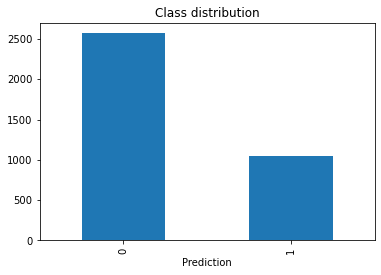

In [16]:
train.pivot_table(index='Prediction',aggfunc='size').plot(kind='bar',title='Class distribution')

<AxesSubplot:title={'center':'Class distribution'}, xlabel='Prediction'>

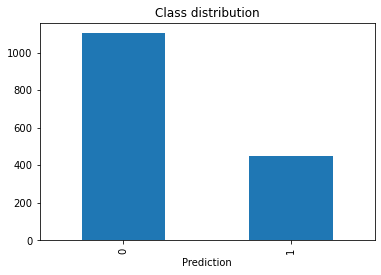

In [17]:
test.pivot_table(index='Prediction',aggfunc='size').plot(kind='bar',title='Class distribution')

In [18]:
X = df.iloc[:,1:3001]

In [19]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [20]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.25,stratify = df['Prediction'])

<IPython.core.display.Javascript object>

(array([918.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 375.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

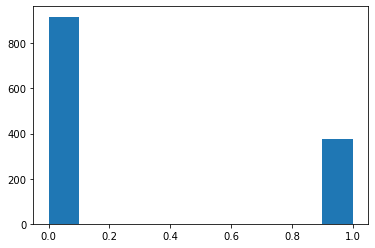

In [21]:
plt.hist(test_y)

### SVM

In [22]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
# C here is the regularization parameter. Here, L2 penalty is used(default). It is the inverse of the strength of regularization.
# As C increases, model overfits.
# Kernel here is the radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(train_x,train_y)
y_pred = svc.predict(test_x)
print("Accuracy Score for SVC : ", accuracy_score(y_pred,test_y))

Accuracy Score for SVC :  0.8963650425367363


In [23]:
acc = accuracy_score(y_pred,test_y)
acc

0.8963650425367363

In [24]:
from sklearn.metrics import precision_score,recall_score,f1_score,fbeta_score,confusion_matrix,classification_report

In [25]:
pre = precision_score(test_y,y_pred)
pre

0.8801261829652997

In [26]:
recall = recall_score(test_y,y_pred)
recall

0.744

In [27]:
f1 = f1_score(test_y,y_pred)
f1

0.8063583815028901

In [28]:
fbeta0_5 = fbeta_score(test_y,y_pred,beta=0.5)
fbeta0_5

0.8490566037735849

In [29]:
fbeta2 = fbeta_score(test_y,y_pred,beta=2)
fbeta2

0.7677490368739681

In [30]:
result = pd.DataFrame(columns=['Accuracy score','Precision','Recall','F1 Score', 'Fbeta Score(0.5)','Fbeta Score(2)'])
result.loc['SVM'] = [acc,pre,recall,f1,fbeta0_5,fbeta2] 
result

,Accuracy score,Precision,Recall,F1 Score,Fbeta Score(0.5),Fbeta Score(2)
SVM,0.896365,0.880126,0.744,0.806358,0.849057,0.767749


In [31]:
confusion_matrix(test_y,y_pred)

array([[880,  38],
       [ 96, 279]], dtype=int64)

In [32]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       918
           1       0.88      0.74      0.81       375

    accuracy                           0.90      1293
   macro avg       0.89      0.85      0.87      1293
weighted avg       0.90      0.90      0.89      1293



### SMOTE : a powerful solution for imbalanced data

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
oversample = SMOTE()

In [35]:
X_sampled, Y_sampled = oversample.fit_resample(X,Y)

In [36]:
X_sampled.shape

(7344, 3000)

In [37]:
Y_sampled.shape

(7344,)

In [38]:
X_sampled.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [39]:
train_x1,test_x1,train_y1,test_y1 = train_test_split(X_sampled,Y_sampled,test_size = 0.25)

<IPython.core.display.Javascript object>

(array([909.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 927.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

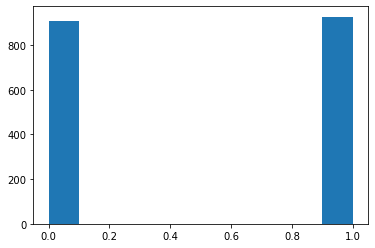

In [40]:
plt.hist(test_y1)

In [41]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
# C here is the regularization parameter. Here, L2 penalty is used(default). It is the inverse of the strength of regularization.
# As C increases, model overfits.
# Kernel here is the radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(train_x1,train_y1)
y_pred1 = svc.predict(test_x1)
print("Accuracy Score for SVC : ", accuracy_score(y_pred1,test_y1))


Accuracy Score for SVC :  0.9449891067538126


In [42]:
confusion_matrix(test_y1,y_pred1)

array([[842,  67],
       [ 34, 893]], dtype=int64)

In [43]:
print(classification_report(test_y1,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       909
           1       0.93      0.96      0.95       927

    accuracy                           0.94      1836
   macro avg       0.95      0.94      0.94      1836
weighted avg       0.95      0.94      0.94      1836



In [44]:
acc = accuracy_score(y_pred1,test_y1)
acc

0.9449891067538126

In [45]:
pre = precision_score(test_y1,y_pred1)
pre

0.9302083333333333

In [46]:
recall = recall_score(test_y1,y_pred1)
recall

0.9633225458468176

In [47]:
f1 = f1_score(test_y1,y_pred1)
f1

0.9464758876523581

In [48]:
fbeta0_5 = fbeta_score(test_y1,y_pred1,beta=0.5)
fbeta0_5

0.936647786868051

In [49]:
fbeta2 = fbeta_score(test_y1,y_pred1,beta=2)
fbeta2

0.9565124250214223

In [50]:
result.loc['SVM_SMOTE'] = [acc,pre,recall,f1,fbeta0_5,fbeta2] 
result

,Accuracy score,Precision,Recall,F1 Score,Fbeta Score(0.5),Fbeta Score(2)
SVM,0.896365,0.880126,0.744000,0.806358,0.849057,0.767749
SVM_SMOTE,0.944989,0.930208,0.963323,0.946476,0.936648,0.956512


In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
KNN.fit(train_x,train_y)
y_pred = KNN.predict(test_x)
print("Accuracy Score for KNN : ", accuracy_score(y_pred,test_y))

Accuracy Score for KNN :  0.8476411446249034


In [52]:
acc = accuracy_score(y_pred,test_y)
acc

0.8476411446249034

In [53]:
pre = precision_score(test_y,y_pred)
pre

0.7099056603773585

In [54]:
recall = recall_score(test_y,y_pred)
recall

0.8026666666666666

In [55]:
f1 = f1_score(test_y,y_pred)
f1

0.7534418022528159

In [56]:
fbeta0_5 = fbeta_score(test_y,y_pred,beta=0.5)
fbeta0_5

0.7267020762916465

In [57]:
fbeta2 = fbeta_score(test_y,y_pred,beta=2)
fbeta2

0.7822245322245321

In [58]:
result.loc['KNN'] = [acc,pre,recall,f1,fbeta0_5,fbeta2] 
result

,Accuracy score,Precision,Recall,F1 Score,Fbeta Score(0.5),Fbeta Score(2)
SVM,0.896365,0.880126,0.744000,0.806358,0.849057,0.767749
SVM_SMOTE,0.944989,0.930208,0.963323,0.946476,0.936648,0.956512
KNN,0.847641,0.709906,0.802667,0.753442,0.726702,0.782225


In [59]:
confusion_matrix(test_y,y_pred)

array([[795, 123],
       [ 74, 301]], dtype=int64)

In [60]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       918
           1       0.71      0.80      0.75       375

    accuracy                           0.85      1293
   macro avg       0.81      0.83      0.82      1293
weighted avg       0.86      0.85      0.85      1293



In [61]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
KNN.fit(train_x1,train_y1)
y_pred1 = KNN.predict(test_x1)
print("Accuracy Score for KNN : ", accuracy_score(y_pred1,test_y1))
acc = accuracy_score(y_pred1,test_y1)
pre = precision_score(test_y1,y_pred1)
recall = recall_score(test_y1,y_pred1)
f1 = f1_score(test_y1,y_pred1)
fbeta0_5 = fbeta_score(test_y1,y_pred1,beta=0.5)
fbeta2 = fbeta_score(test_y1,y_pred1,beta=2)
result.loc['KNN_SMOTE'] = [acc,pre,recall,f1,fbeta0_5,fbeta2] 
result

Accuracy Score for KNN :  0.8371459694989106


,Accuracy score,Precision,Recall,F1 Score,Fbeta Score(0.5),Fbeta Score(2)
SVM,0.896365,0.880126,0.744000,0.806358,0.849057,0.767749
SVM_SMOTE,0.944989,0.930208,0.963323,0.946476,0.936648,0.956512
KNN,0.847641,0.709906,0.802667,0.753442,0.726702,0.782225
KNN_SMOTE,0.837146,0.756956,0.997843,0.860866,0.795357,0.938134


In [62]:
confusion_matrix(test_y1,y_pred1)

array([[612, 297],
       [  2, 925]], dtype=int64)

In [63]:
print(classification_report(test_y1,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       909
           1       0.76      1.00      0.86       927

    accuracy                           0.84      1836
   macro avg       0.88      0.84      0.83      1836
weighted avg       0.88      0.84      0.83      1836



### Using GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [65]:
knn_model=KNeighborsClassifier()

In [66]:
hyperparamters = {'n_neighbors':np.arange(2,10),
                 'p':[1,2]}
rscv_model= RandomizedSearchCV(knn_model,hyperparamters,cv=5)
rscv_model.fit(train_x1,train_y1)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'p': [1, 2]})

In [67]:
rscv_model.best_params_

{'p': 2, 'n_neighbors': 2}

In [70]:
knn_model= KNeighborsClassifier(n_neighbors=2,p=2)
# Train the model using the training sets
knn_model.fit(train_x,train_y)
y_pred = knn_model.predict(test_x)
print("Accuracy Score for KNN : ", accuracy_score(y_pred,test_y))
acc = accuracy_score(y_pred,test_y)
pre = precision_score(test_y,y_pred)
recall = recall_score(test_y,y_pred)
f1 = f1_score(test_y,y_pred)
fbeta0_5 = fbeta_score(test_y,y_pred,beta=0.5)
fbeta2 = fbeta_score(test_y,y_pred,beta=2)
result.loc['KNN_SMOTE_Hyperparameter_Tuning'] = [acc,pre,recall,f1,fbeta0_5,fbeta2] 
result

Accuracy Score for KNN :  0.8592420726991493


,Accuracy score,Precision,Recall,F1 Score,Fbeta Score(0.5),Fbeta Score(2)
SVM,0.896365,0.880126,0.744000,0.806358,0.849057,0.767749
SVM_SMOTE,0.944989,0.930208,0.963323,0.946476,0.936648,0.956512
KNN,0.847641,0.709906,0.802667,0.753442,0.726702,0.782225
KNN_SMOTE,0.837146,0.756956,0.997843,0.860866,0.795357,0.938134
KNN_SMOTE_Hyperparameter_Tuning,0.859242,0.793313,0.696000,0.741477,0.771733,0.713505


In [71]:
knn_model= KNeighborsClassifier(n_neighbors=2,p=2)
# Train the model using the training sets
knn_model.fit(train_x1,train_y1)
y_pred1 = knn_model.predict(test_x1)
print("Accuracy Score for KNN : ", accuracy_score(y_pred1,test_y1))
acc = accuracy_score(y_pred1,test_y1)
pre = precision_score(test_y1,y_pred1)
recall = recall_score(test_y1,y_pred1)
f1 = f1_score(test_y1,y_pred1)
fbeta0_5 = fbeta_score(test_y1,y_pred1,beta=0.5)
fbeta2 = fbeta_score(test_y1,y_pred1,beta=2)
result.loc['KNN_SMOTE_Hyperparameter_Tuning1'] = [acc,pre,recall,f1,fbeta0_5,fbeta2] 
result

Accuracy Score for KNN :  0.8932461873638344


,Accuracy score,Precision,Recall,F1 Score,Fbeta Score(0.5),Fbeta Score(2)
SVM,0.896365,0.880126,0.744000,0.806358,0.849057,0.767749
SVM_SMOTE,0.944989,0.930208,0.963323,0.946476,0.936648,0.956512
KNN,0.847641,0.709906,0.802667,0.753442,0.726702,0.782225
KNN_SMOTE,0.837146,0.756956,0.997843,0.860866,0.795357,0.938134
KNN_SMOTE_Hyperparameter_Tuning,0.859242,0.793313,0.696000,0.741477,0.771733,0.713505
KNN_SMOTE_Hyperparameter_Tuning1,0.893246,0.829576,0.992449,0.903733,0.857729,0.954951
